## Task 6 - Prediction using Decision Tree Algorithm

##### Author - Aditya Gupta

##### Submitted to - The Sparks Foundation 

From the 'Iris Dataset', create a decision tree classifier and visualize it graphically.
Importing the libraries

#### Importing Important Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Importing the Data

In [2]:
df = pd.read_csv('Iris.csv')
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.drop(['Id'],axis =1, inplace = True)

#### Exploring the Data

In [4]:
df.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.tail(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.3+ KB


In [7]:
df.groupby('Species').describe()

SepalLengthCm                                              \
                        count   mean       std  min    25%  50%  75%  max   
Species                                                                     
Iris-setosa              50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
Iris-versicolor          50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
Iris-virginica           50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

                SepalWidthCm         ... PetalLengthCm      PetalWidthCm  \
                       count   mean  ...           75%  max        count   
Species                              ...                                   
Iris-setosa             50.0  3.418  ...         1.575  1.9         50.0   
Iris-versicolor         50.0  2.770  ...         4.600  5.1         50.0   
Iris-virginica          50.0  2.974  ...         5.875  6.9         50.0   

                                                           
                  mean       std  min  25%  50%  75%  max  
Species                                                    
Iris-setosa      0.244  0.107210  0.1  0.2  0.2  0.3  0.6  
Iris-versicolor  1.326  0.197753  1.0  1.2  1.3  1.5  1.8  
Iris-virginica   2.026  0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

In [8]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### Correlation between the Features

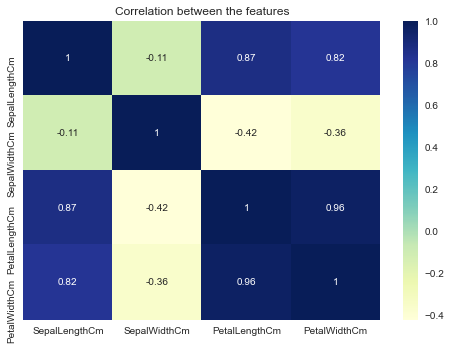

In [9]:
plt.style.use('seaborn')
sns.heatmap(df.corr(),cmap = 'YlGnBu',annot=True)
plt.title('Correlation between the features')
plt.show()

#### Scatter plot 1

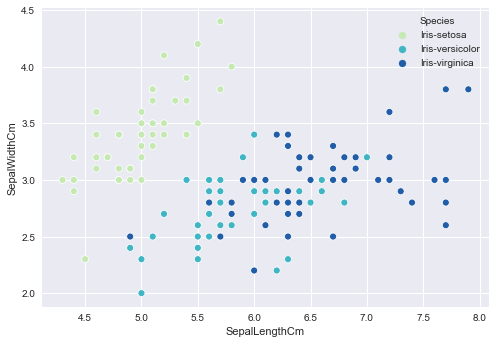

In [10]:
sns.scatterplot(x=df['SepalLengthCm'],y=df['SepalWidthCm'],hue=df['Species'], palette = 'YlGnBu')
plt.show()

#### Scatter plot 2

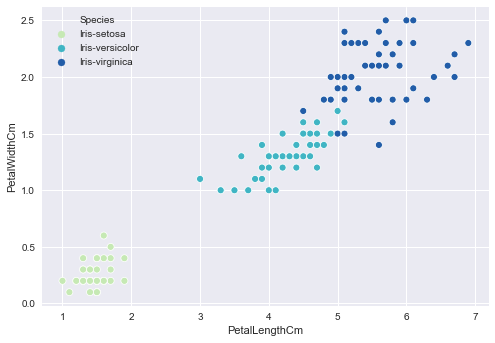

In [11]:
sns.scatterplot(x=df['PetalLengthCm'],y=df['PetalWidthCm'],palette='YlGnBu',hue=df['Species'])
plt.show()

### Making a Pairplot Between all the Features

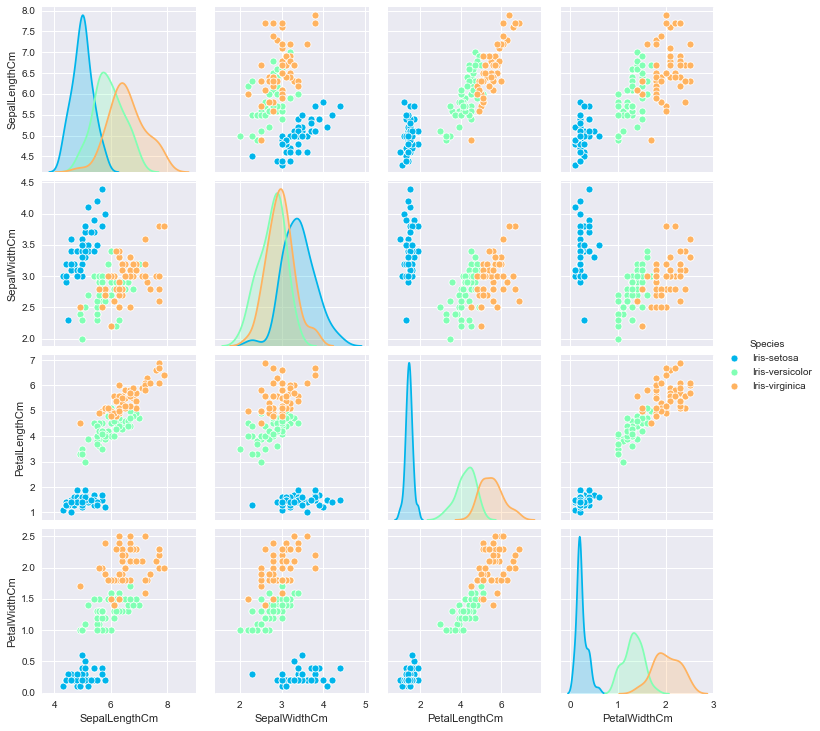

In [12]:
sns.pairplot(df,hue='Species',palette = 'rainbow')
plt.show()

#### Dividing the Data into Class and Features

In [13]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]


#### Encoding the Dependent Class

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

#### Spliting the Data in Training Testing Sets

In [74]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state = 23)

#### Building the Model

In [78]:
from sklearn.tree import DecisionTreeClassifier
dtree= DecisionTreeClassifier(max_depth = 3,criterion='entropy')
dtree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

#### Testing the Accuracy

In [79]:
y_pred = dtree.predict(x_test)
print('Train data accuracy is',dtree.score(x_train,y_train)*100)
print('Test data accuracy is',dtree.score(x_test,y_test)*100)

Train data accuracy is 96.66666666666667
Test data accuracy is 96.66666666666667


#### Cross Validating the Data

In [82]:
from sklearn.model_selection import cross_val_score
acc=cross_val_score(estimator=dtree,X=x_train,y=y_train,cv=5)
print('Cross Validation accuracy on training data is :',acc.mean()*100,'%')

Cross Validation accuracy on training data is : 94.16666666666667 %


#### Classification Report

In [83]:
from sklearn.metrics import confusion_matrix,classification_report
print("Classification Report is:\n")
print(classification_report(y_test,y_pred))

Classification Report is:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.89      1.00      0.94         8
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



#### Visualizing the Decision Tree

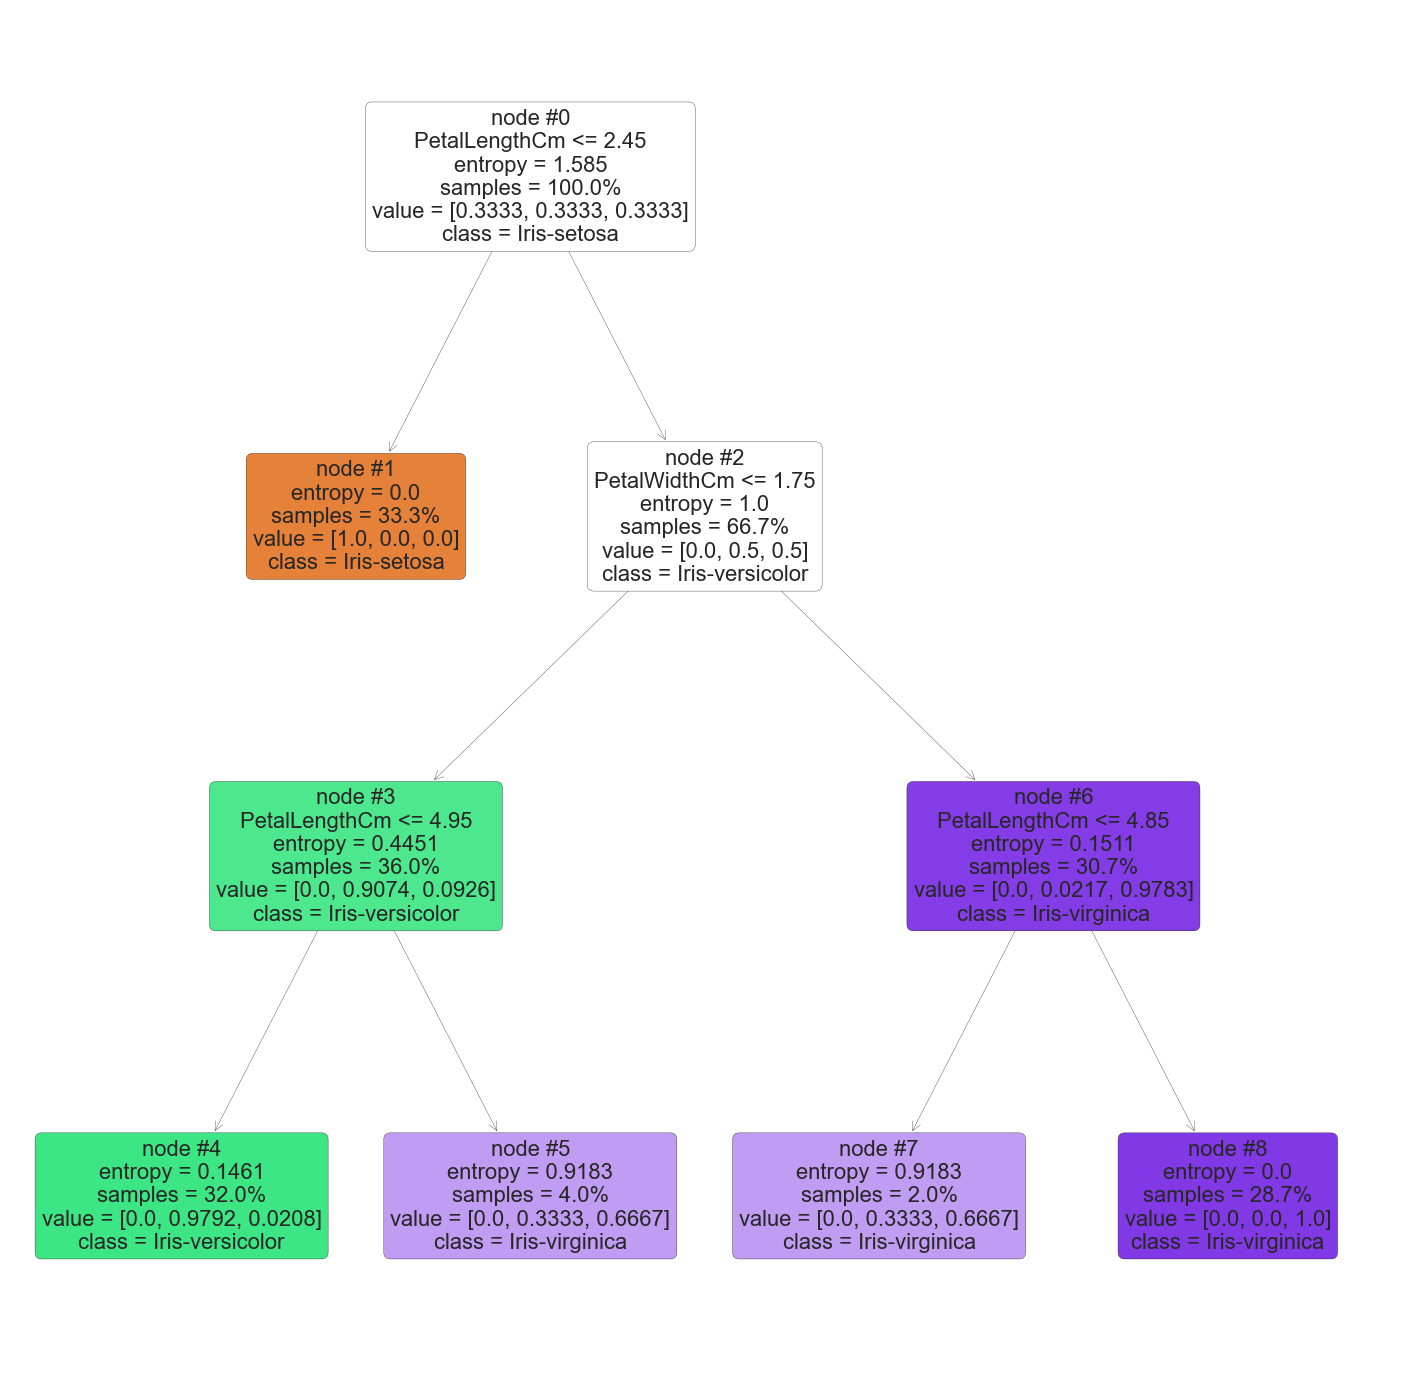

In [88]:
from sklearn.tree import plot_tree
plt.figure(figsize=(25,25))
tree_img = plot_tree(dtree.fit(x,y),feature_names=df.columns,class_names=df['Species'].unique().tolist(),filled=True,precision=4,node_ids = True, label="all",proportion=True,rounded=True,fontsize=22)
plt.show()